MNIST 데이터셋을 불러와서 사용하겠습니다.

In [1]:
from sklearn.datasets import fetch_openml
import numpy as np

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

In [2]:
from sklearn.model_selection import train_test_split

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

아래 코드는 차원을 축소하지 않고 PCA를 계산한 뒤 훈련 세트의 분산을 95%로 유지하는 데<br>
필요한 최소한의 차원 수를 계산합니다.

In [3]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train)

PCA()

In [4]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
cumsum

array([0.09731822, 0.1689175 , 0.23034547, 0.28428664, 0.33331087,
       0.37654751, 0.40925491, 0.43806471, 0.46551967, 0.48910401,
       0.51022635, 0.53077735, 0.54777857, 0.5647064 , 0.58048775,
       0.59539657, 0.60853605, 0.62125904, 0.6331598 , 0.64463121,
       0.6553152 , 0.66542503, 0.67504796, 0.68413984, 0.69294662,
       0.70130113, 0.70940135, 0.71724801, 0.72466504, 0.73158367,
       0.73814671, 0.74460179, 0.75061931, 0.75647036, 0.76210427,
       0.76754079, 0.77260689, 0.77747854, 0.78226603, 0.78693669,
       0.79147898, 0.79592989, 0.80008889, 0.80403882, 0.80788265,
       0.81166   , 0.81528355, 0.81878351, 0.8221564 , 0.82535804,
       0.82854081, 0.83164163, 0.83461924, 0.83748793, 0.84030856,
       0.84301292, 0.84570377, 0.84827703, 0.8508048 , 0.8532634 ,
       0.855658  , 0.85803751, 0.86031947, 0.86253301, 0.86466248,
       0.86671478, 0.86873468, 0.87068744, 0.87260511, 0.87449199,
       0.87636251, 0.87816811, 0.87993944, 0.88167766, 0.88333

In [5]:
d = np.argmax(cumsum >= 0.95) + 1
d

154

154개의 차원을 이용했을 때 세트의 분산을 95%로 유지할 수 있음을 알아냈습니다.

이제 이렇게 구한 n_components=d 로 설정해서 PCA를 다시 실행합니다.

근데 이렇게 하기보다는 그냥 보존하려는 분산의 비율을 바로 n_components에 전달해주는 게 더 낫습니다.

In [6]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

In [7]:
print(X_train.shape, X_reduced.shape)

(52500, 784) (52500, 154)


784차원에서 154차원으로 차원 축소가 된 것을 알 수 있습니다.

또 다른 방법은 설명된 분산을 차원 수에 대한 함수로 그리는 것입니다.<br>
(그냥 cumsum을 그래프로 그리면 됩니다.)

일반적으로 이 그래프에는 설명된 분산의 빠른 성장이 멈추는 변곡점이 있습니다.

여기서는 차원을 약 100으로 축소해도 설명된 분산을 크게 손해보지 않을 것입니다.

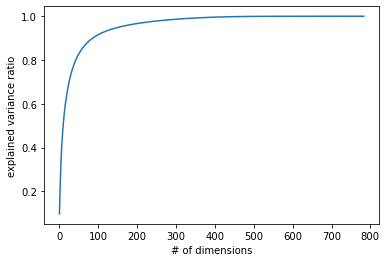

In [8]:
import matplotlib.pyplot as plt

plt.plot(np.arange(0, 784), cumsum)
plt.xlabel('# of dimensions')
plt.ylabel('explained variance ratio')
plt.show()